In [59]:
#import the required libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score



In [109]:

#using the panda to read the data from csv file
leads_df = pd.read_csv('leads.csv')

In [110]:
#describe data and give shape to the data set

#leads dataset from the past with around 9000 data 
leads_df.shape

(9240, 37)

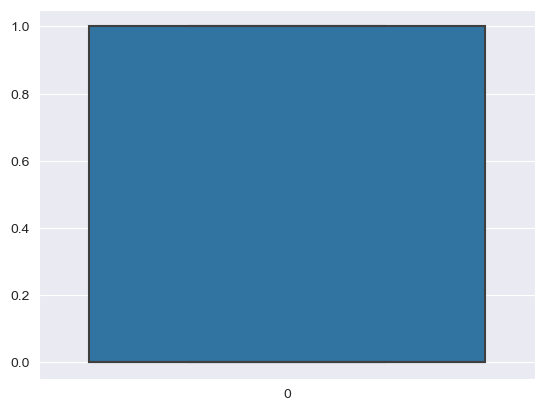

In [69]:
leads_df.describe()


,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [70]:
leads_df.dropna(inplace=True)

First few rows of the dataframe:
    Lead Number  ...  Last Notable Activity_Unsubscribed
2        660727  ...                               False
3        660719  ...                               False
4        660681  ...                               False
6        660673  ...                               False
10       660608  ...                               False

[5 rows x 2084 columns]

Summary statistics of numerical columns:
         Lead Number  ...  Asymmetrique Profile Score
count    1943.000000  ...                 1943.000000
mean   619510.328358  ...                   16.990736
std     29440.943939  ...                    1.901790
min    579533.000000  ...                   12.000000
25%    588359.000000  ...                   15.000000
50%    633912.000000  ...                   17.000000
75%    645768.000000  ...                   18.000000
max    660727.000000  ...                   20.000000

[8 rows x 7 columns]

Missing values:
Lead Number                      

<Figure size 800x600 with 0 Axes>

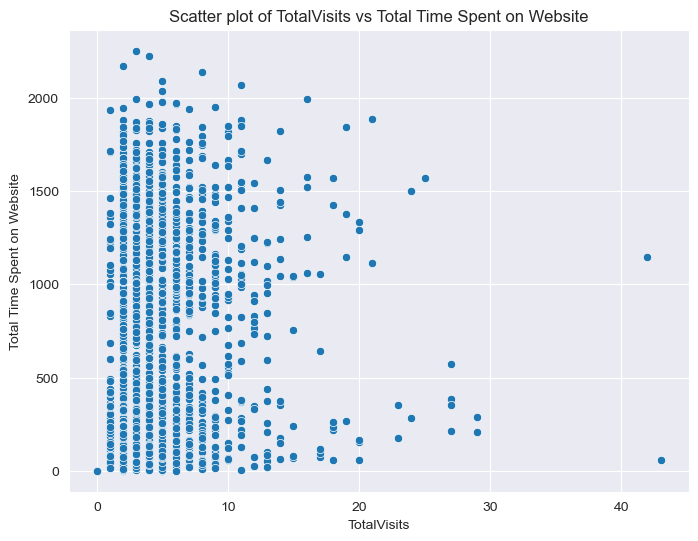

In [108]:
leads_df = leads_df.replace('Select', np.nan)
# Display the first few rows of the dataframe
print("First few rows of the dataframe:")
print(leads_df.head())

# Get summary statistics of numerical columns
print("\nSummary statistics of numerical columns:")
print(leads_df.describe())

# Check for missing values
print("\nMissing values:")
print(leads_df.isnull().sum())

X = leads_df.drop('Converted', axis=1)
Y = leads_df['Converted']

plt.figure(figsize=(8, 6))

plt.figure(figsize=(8, 6))
sns.scatterplot(x='TotalVisits', y='Total Time Spent on Website', data=leads_df)
plt.title('Scatter plot of TotalVisits vs Total Time Spent on Website')
plt.xlabel('TotalVisits')
plt.ylabel('Total Time Spent on Website')
plt.show()


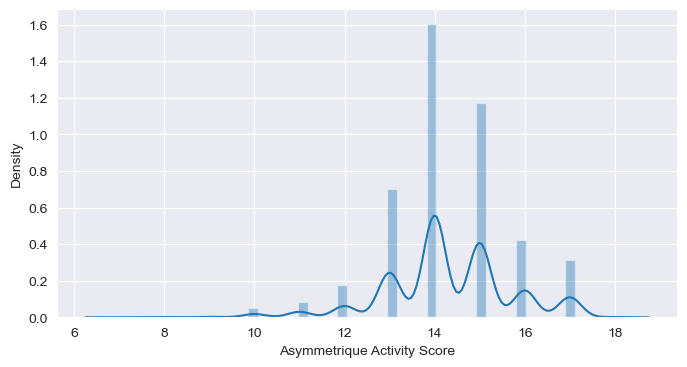

In [94]:
plt.figure(figsize=(8,4))
sns.distplot(df["Asymmetrique Activity Score"]);

In [95]:
X = leads_df.drop('Converted', axis=1)
Y = leads_df['Converted']


In [74]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [75]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

model = LogisticRegression()
model.fit(X_train_scaled, y_train)


LogisticRegression()

In [76]:
y_pred = model.predict(X_val_scaled)

In [77]:
accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)
roc_auc = roc_auc_score(y_val, y_pred)

print("Model Evaluation:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC Score:", roc_auc)


Model Evaluation:
Accuracy: 0.9511568123393316
Precision: 0.9541284403669725
Recall: 0.9585253456221198
F1 Score: 0.9563218390804599
ROC AUC Score: 0.9501929053691994


In [101]:
leads_df.replace('Select', np.nan, inplace=True)

# Separate independent variables (X) and dependent variable (Y)
X = leads_df[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']]
Y = leads_df['Converted']

# Add a constant term to the independent variables
X = sm.add_constant(X)

# Fit the OLS model
model = sm.OLS(Y, X)
results = model.fit()

# Print the summary of the regression results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              Converted   R-squared:                       0.238
Model:                            OLS   Adj. R-squared:                  0.237
Method:                 Least Squares   F-statistic:                     201.7
Date:                Sat, 24 Feb 2024   Prob (F-statistic):          7.33e-114
Time:                        18:45:55   Log-Likelihood:                -1141.2
No. Observations:                1943   AIC:                             2290.
Df Residuals:                    1939   BIC:                             2313.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

ValueError: shapes (1943,4) and (1943,2083) not aligned: 4 (dim 1) != 1943 (dim 0)